In [274]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from utils import *

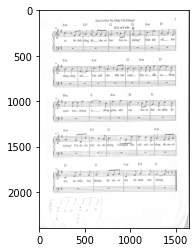

In [275]:
img = cv2.imread(r"C:\Users\nguye\Downloads\6.jpg", cv2.IMREAD_GRAYSCALE)
retval, imgFindLine = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
# img = imgFindLine
# image = cv2.imread(r"C:\Users\nguye\Downloads\Kmo04.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray')

In [276]:
HEIGHT, WIDTH = img.shape

rowsWithLine = blackHorizontalLinesRowInd(imgFindLine, HEIGHT, WIDTH, 0.45)
trimmedRowsWithLine = trimRowsWithLine(rowsWithLine, minGap = 5)
plt.imshow(drawHorizontalLines(trimmedRowsWithLine, img), cmap = 'gray')

print(trimmedRowsWithLine)
print('There are', len(trimmedRowsWithLine), 'lines')

IndexError: list index out of range

In [ ]:
lineClusterLst = linesClustering(trimmedRowsWithLine, minGap = 50)
avgLinesGapCluster = averageLinesGapCluster(lineClusterLst)
avgLinesGap = averageLinesGapAll(avgLinesGapCluster)

print('There are', len(lineClusterLst), 'line clusters')
print(lineClusterLst)
print('Average line gap cluster:', avgLinesGapCluster)
print('Average line gap:', avgLinesGap)

There are 8 line clusters
[[167, 186, 205, 224, 242], [406, 424, 443, 462, 481], [668, 687, 706, 724, 743], [902, 921, 940, 959, 977], [1165, 1184, 1202, 1221, 1240], [1381, 1399, 1418, 1437, 1456], [1643, 1662, 1681, 1699, 1718], [1877, 1896, 1915, 1934, 1952]]
Average line gap cluster: {(167, 242): 18.75, (406, 481): 18.75, (668, 743): 18.75, (902, 977): 18.75, (1165, 1240): 18.75, (1381, 1456): 18.75, (1643, 1718): 18.75, (1877, 1952): 18.75}
Average line gap: 18.75


In [ ]:
columnsWithLine = blackVerticalLinesColumnInd(imgFindLine, HEIGHT, WIDTH, lineClusterLst, threshold = 0.99)
columnsWithLine

{(167, 242): [94,
  95,
  396,
  397,
  398,
  399,
  449,
  450,
  451,
  501,
  502,
  503,
  504,
  554,
  555,
  556,
  606,
  607,
  608,
  703,
  704,
  705,
  736,
  737,
  738,
  788,
  789,
  790,
  841,
  842,
  843,
  893,
  894,
  895,
  1112,
  1113,
  1114,
  1521,
  1522,
  1523,
  2009,
  2010,
  2011],
 (406, 481): [93,
  94,
  95,
  703,
  704,
  705,
  1112,
  1113,
  1114,
  1521,
  1522,
  1523,
  1573,
  1574,
  1575,
  1715,
  1716,
  1717,
  2009,
  2010,
  2011],
 (668, 743): [93,
  94,
  95,
  664,
  665,
  666,
  1121,
  1122,
  1123,
  1565,
  1566,
  1567,
  2009,
  2010,
  2011],
 (902, 977): [93,
  94,
  95,
  664,
  665,
  666,
  716,
  717,
  718,
  1121,
  1122,
  1123,
  1565,
  1566,
  1567,
  1617,
  1618,
  1619,
  1755,
  1756,
  1757,
  1966,
  1967,
  1968,
  2009,
  2010,
  2011],
 (1165, 1240): [93,
  94,
  95,
  691,
  692,
  693,
  1175,
  1176,
  1177,
  1592,
  1593,
  1594,
  2009,
  2010,
  2011],
 (1381, 1456): [93,
  94,
  95,
  244,
 

In [ ]:
trimmedColumnsWithLine = trimColumnsWithLine(columnsWithLine, minGap = 100)
print(trimmedColumnsWithLine)

{(167, 242): [94, 396, 1112, 1521, 2009], (406, 481): [93, 703, 1112, 1521, 1715, 2009], (668, 743): [93, 664, 1121, 1565, 2009], (902, 977): [93, 664, 1121, 1565, 1755, 1966], (1165, 1240): [93, 691, 1175, 1592, 2009], (1381, 1456): [93, 244, 691, 1175, 1592, 1785, 2009], (1643, 1718): [93, 719, 1009, 1218, 1369, 1716, 2009], (1877, 1952): [93, 244, 719, 1218, 1716, 2009]}


In [ ]:
list(trimmedColumnsWithLine)

[(167, 242),
 (406, 481),
 (668, 743),
 (902, 977),
 (1165, 1240),
 (1381, 1456),
 (1643, 1718),
 (1877, 1952)]

137 51


Text(0.5, 1.0, 'Resize')

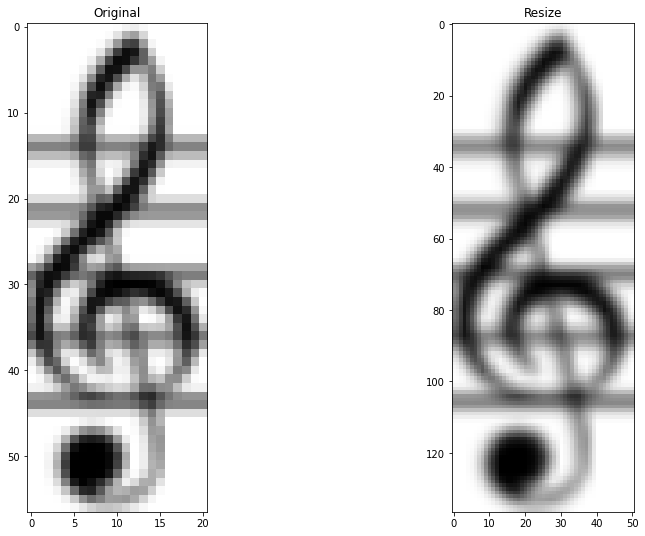

In [ ]:
CLEF_W_H_RATIO = 3/8 #W/H
CLEF_H_LINE_GAP_RATIO = 7.35

CLEF_H = int(avgLinesGap * CLEF_H_LINE_GAP_RATIO)
CLEF_W = int(avgLinesGap * CLEF_H_LINE_GAP_RATIO * CLEF_W_H_RATIO)

clefTemplate = cv2.imread(r"C:\Users\nguye\Downloads\templates\clef\clef.png", cv2.IMREAD_GRAYSCALE)

clefTemplateResize = cv2.resize(clefTemplate, (CLEF_W, CLEF_H))
print(CLEF_H, CLEF_W)

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(clefTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(clefTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([ 98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,
        98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  98,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 101, 101, 101, 101,
       101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
       101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
       101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101,
       102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102,
       102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102, 102,
       102, 102, 102, 102, 102, 102, 102, 102, 102, 102

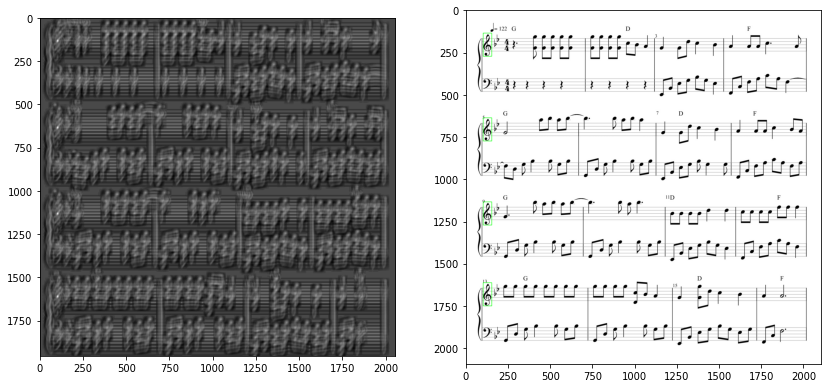

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

clefLoc, clefRes, clefBox = matchTemplateRemake(img, clefTemplateResize, 0.45, None, True, True)

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(clefRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(clefBox, cmap = 'gray')

(18, 22) 42


Text(0.5, 1.0, 'Resize')

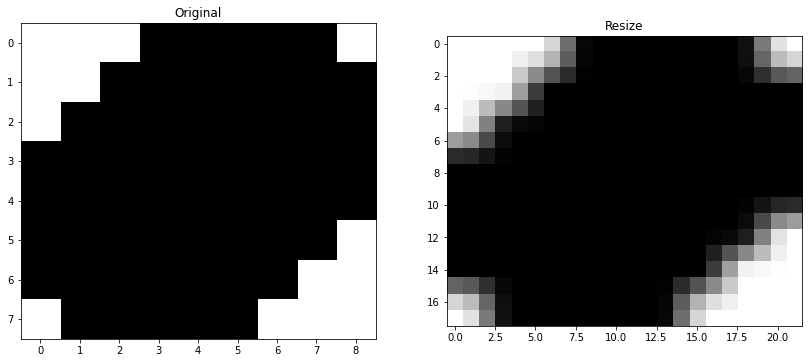

In [ ]:
# blackNoteTemplate = cv2.imread(r"C:\Users\nguye\Downloads\quarter.png", cv2.IMREAD_GRAYSCALE)
# blackNoteTemplate = cv2.imread(r"C:\Users\nguye\Downloads\blackNote.png", cv2.IMREAD_GRAYSCALE)

blackNoteTemplate = np.array([
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 255],
    [255, 255, 0  , 0  , 0  , 0  , 0  , 0  , 0  ],
    [255, 0  , 0  , 0  , 0  , 0  , 0  , 0  , 0  ],
    [0  , 0  , 0  , 0  , 0  , 0  , 0  , 0  , 0  ],
    [0  , 0  , 0  , 0  , 0  , 0  , 0  , 0  , 0  ],
    [0  , 0  , 0  , 0  , 0  , 0  , 0  , 0  , 255],
    [0  , 0  , 0  , 0  , 0  , 0  , 0  , 255, 255],
    [255, 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

blackChosenSize, blackMaxMatched = tryTemplateMatchNote(img, blackNoteTemplate, 5/4, 0.9, avgLinesGap, error = 3)
print(blackChosenSize, blackMaxMatched)

blackTemplateSize = blackChosenSize[0]

# blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(avgLinesGap), int(avgLinesGap)))
blackNoteTemplateResize = cv2.resize(blackNoteTemplate, (int(blackTemplateSize * (5/4)), int(blackTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(blackNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(blackNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([ 143,  143,  143,  144,  144,  144,  145,  218,  218,  218,  219,
        219,  219,  219,  219,  220,  220,  220,  220,  220,  220,  220,
        220,  221,  221,  221,  221,  221,  221,  221,  221,  221,  221,
        221,  221,  222,  222,  222,  222,  222,  222,  222,  222,  222,
        222,  222,  222,  222,  222,  222,  222,  222,  222,  222,  223,
        223,  223,  223,  223,  223,  223,  223,  223,  223,  223,  223,
        223,  223,  223,  223,  223,  223,  223,  223,  223,  223,  224,
        224,  224,  224,  224,  224,  224,  224,  224,  224,  224,  224,
        224,  224,  224,  224,  224,  224,  224,  224,  224,  224,  225,
        225,  225,  225,  225,  225,  225,  225,  225,  225,  225,  225,
        225,  225,  225,  225,  225,  225,  225,  225,  225,  226,  226,
        226,  226,  226,  226,  226,  226,  226,  226,  226,  226,  226,
        226,  226,  226,  227,  227,  227,  227,  227,  227,  227,  227,
        227,  227,  227,  227,  227,  227,

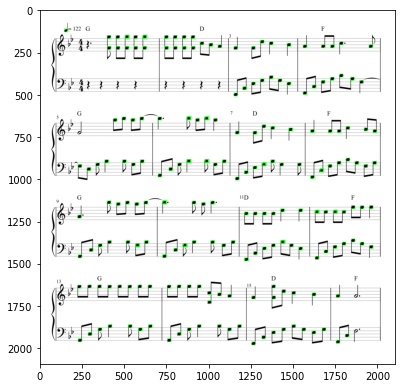

In [ ]:
blackLoc, blackRes, blackBox = matchTemplateRemake(img, blackNoteTemplateResize, 0.58, None, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(blackRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(blackBox, cmap = 'gray')

In [ ]:
# cv2.imwrite(r"C:\Users\nguye\Downloads\res.jpg", imgCopy)

(15, 18) 0


Text(0.5, 1.0, 'Resize')

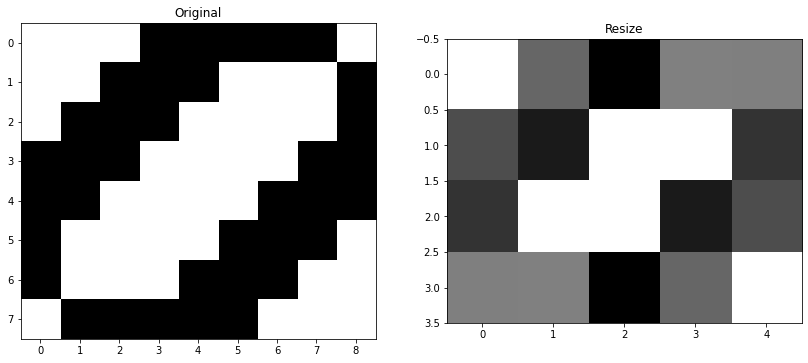

In [277]:
# whiteNoteTemplate = np.array([
#     [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 255],
#     [255, 255, 0  , 0  , 255, 255, 255, 255, 0  ],
#     [255, 0  , 0  , 255, 255, 255, 255, 255, 0  ],
#     [0  , 0  , 255, 255, 255, 255, 255, 255, 0  ],
#     [0  , 255, 255, 255, 255, 255, 255, 0  , 0  ],
#     [0  , 255, 255, 255, 255, 255, 0  , 0  , 255],
#     [0  , 255, 255, 255, 255, 0  , 0  , 255, 255],
#     [255, 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
# ], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

whiteNoteTemplate = np.array([
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 255],
    [255, 255, 0  , 0  , 0  , 255, 255, 255, 0  ],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 0  ],
    [0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  ],
    [0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  ],
    [0  , 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [255, 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 10/8 = 5/4

whiteChosenSize, whiteMaxMatched = tryTemplateMatchNote(img, whiteNoteTemplate, 5/4, 0.7, avgLinesGap, error = 3)
print(whiteChosenSize, whiteMaxMatched)
whiteTemplateSize = whiteChosenSize[0]

whiteNoteTemplateResize = cv2.resize(whiteNoteTemplate, (int(whiteTemplateSize * (5/4)), int(whiteTemplateSize)))
whiteNoteTemplateResize = cv2.resize(whiteNoteTemplate, (int(5), int(4)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(whiteNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(whiteNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([ 221,  221,  222,  222,  222,  223,  223,  223,  224,  224,  224,
        225,  225,  226, 1854, 1854, 1855, 1855, 1855, 1855, 1855, 1856,
       1856, 1856, 1856, 1856, 1856, 1857, 1857, 1857, 1857, 1857, 1857,
       1858, 1858, 1858, 1858, 1858, 1858, 1859, 1859, 1859, 1859, 1860],
      dtype=int64), array([ 718,  719,  717,  718,  719,  716,  717,  718,  715,  716,  717,
        715,  716,  715, 1685, 1891, 1683, 1684, 1685, 1890, 1891, 1682,
       1683, 1684, 1889, 1890, 1891, 1682, 1683, 1684, 1888, 1889, 1890,
       1681, 1682, 1683, 1887, 1888, 1889, 1681, 1682, 1887, 1888, 1681],
      dtype=int64))
Before: 44 founded
After: (array([ 223, 1856, 1856], dtype=int64), array([ 716, 1682, 1889], dtype=int64))
After: 3 founded


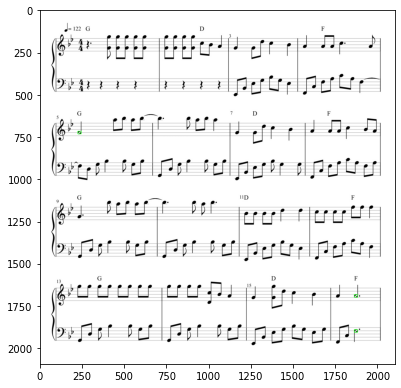

In [ ]:
whiteLoc, whiteRes, whiteBox = matchTemplateRemake(img, whiteNoteTemplateResize, 0.6, None, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(whiteRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(whiteBox, cmap = 'gray')

(15, 24) 0


Text(0.5, 1.0, 'Resize')

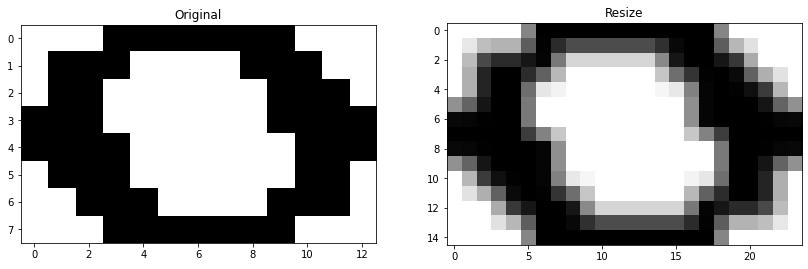

In [ ]:
whiteAloneNoteTemplate = np.array([
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [255, 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 0  ],
    [0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  ],
    [255, 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [255, 255, 0  , 0  , 0  , 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [255, 255, 255, 0  , 0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 13/8

whiteAloneChosenSize, whiteAloneMaxMatched = tryTemplateMatchNote(img, whiteAloneNoteTemplate, 13/8, 0.7, avgLinesGap, error = 3)
print(whiteAloneChosenSize, whiteAloneMaxMatched)
whiteAloneTemplateSize = whiteAloneChosenSize[0]

whiteAloneNoteTemplateResize = cv2.resize(whiteAloneNoteTemplate, (int(whiteAloneTemplateSize * (13/8)), int(whiteAloneTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(whiteAloneNoteTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(whiteAloneNoteTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([], dtype=float64), array([], dtype=float64))
Before: 0 founded
After: (array([], dtype=float64), array([], dtype=float64))
After: 0 founded


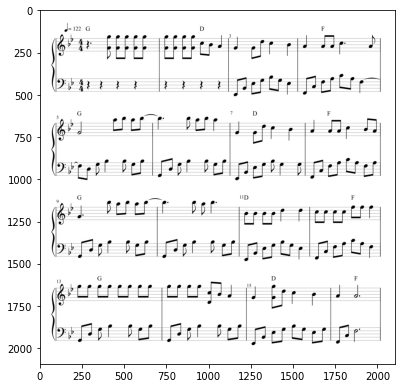

In [ ]:
whiteAloneLoc, whiteAloneRes, whiteAloneBox = matchTemplateRemake(img, whiteAloneNoteTemplateResize, 0.6, None, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(whiteAloneRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(whiteAloneBox, cmap = 'gray')

46


Text(0.5, 1.0, 'Resize')

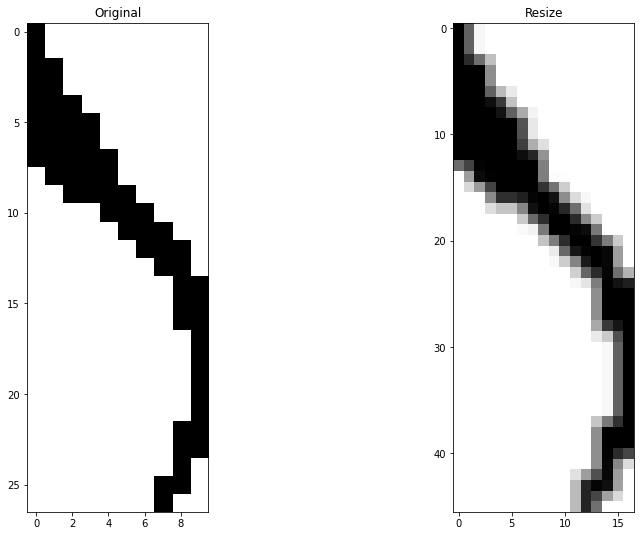

In [ ]:
hookTemplate = np.array([
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255],
    [0  , 255, 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255],
    [0  , 255, 255, 0  , 0  , 0  , 0  , 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 0  , 0  , 0  , 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 0  , 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
], dtype = np.uint8) # Ratio W/H = 1/3

hookTemplate = np.array([
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 255, 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 255, 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 255, 255, 255, 255, 255, 255],
    [0  , 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255],
    [255, 0  , 0  , 0  , 0  , 255, 255, 255, 255, 255],
    [255, 255, 0  , 0  , 0  , 0  , 255, 255, 255, 255],
    [255, 255, 255, 255, 0  , 0  , 0  , 255, 255, 255],
    [255, 255, 255, 255, 255, 0  , 0  , 0  , 255, 255],
    [255, 255, 255, 255, 255, 255, 0  , 0  , 0  , 255],
    [255, 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 255, 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 0  , 0  ],
    [255, 255, 255, 255, 255, 255, 255, 255, 0  , 255],
    [255, 255, 255, 255, 255, 255, 255, 0  , 0  , 255],
    [255, 255, 255, 255, 255, 255, 255, 0  , 255, 255],
], dtype = np.uint8) # Ratio W/H = 10/27

# hookChosenSize, hookMaxMatched = tryTemplateMatchNote(img, hookTemplate, 1/3, 0.7, avgLinesGap, error = 3)
# print(hookChosenSize, hookMaxMatched)
hookChosenSize = int(avgLinesGap * 3)
hookChosenSize = int(avgLinesGap * 2.5)
print(hookChosenSize)
hookTemplateSize = hookChosenSize

hookTemplateResize = cv2.resize(hookTemplate, (int(hookTemplateSize * (10/27)), int(hookTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(hookTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(hookTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([1962, 1962, 1962, 1962, 1963, 1963, 1963, 1963, 1964, 1964, 1964],
      dtype=int64), array([146, 147, 148, 149, 147, 148, 149, 150, 148, 149, 150], dtype=int64))
Before: 11 founded
After: (array([1962], dtype=int64), array([148], dtype=int64))
After: 1 founded


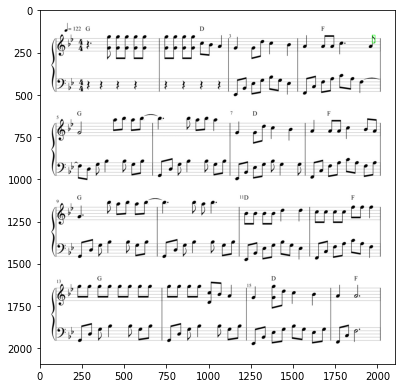

In [ ]:
hookLoc, hookRes, hookBox = matchTemplateRemake(img, hookTemplateResize, 0.6, None, True, True)

plt.figure(figsize = (14, 9))
# plt.subplot(1, 2, 1); plt.imshow(hookRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(hookBox, cmap = 'gray')

46


Text(0.5, 1.0, 'Resize')

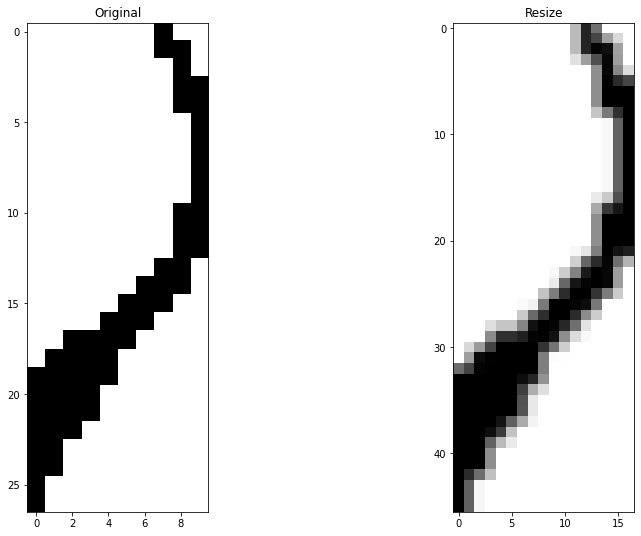

In [ ]:
hookRotatedTemplate =  cv2.flip(hookTemplate, 0) # Ratio W/H = 1/3

# hookRotatedChosenSize, hookRotatedMaxMatched = tryTemplateMatchNote(img, hookRotatedTemplate, 1/3, 0.7, avgLinesGap, error = 3)
# print(hookRotatedChosenSize, hookRotatedMaxMatched)
hookRotatedChosenSize = int(avgLinesGap * 3)
hookRotatedChosenSize = int(avgLinesGap * 2.5)
print(hookRotatedChosenSize)
hookRotatedTemplateSize = hookRotatedChosenSize

hookRotatedTemplateResize = cv2.resize(hookRotatedTemplate, (int(hookRotatedTemplateSize * (10/27)), int(hookRotatedTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(hookRotatedTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(hookRotatedTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([ 105,  105,  105,  105,  105,  105,  105,  105,  105,  105,  105,
        105,  106,  106,  106,  106,  106,  106,  106,  106,  106,  106,
        106,  106,  106,  106,  106,  106,  106,  106,  106,  106,  106,
        106,  106,  106,  106,  106,  106,  106,  106,  106,  107,  107,
        107,  107,  107,  107,  107,  107,  107,  107,  107,  107,  107,
        107,  107,  107,  107,  107,  107,  107,  107,  107,  107,  107,
        107,  107,  107,  107,  107,  107,  107,  107,  108,  108,  108,
        108,  108,  108,  108,  108,  108,  108,  108,  108,  108,  108,
        108,  108,  108,  108,  108,  108,  108,  108,  108,  108,  113,
        113,  113,  113,  114,  114,  114,  114,  114,  114,  114,  114,
        115,  115,  115,  115,  115,  115,  115,  115,  116,  116,  116,
        116,  116,  116,  116,  116,  116,  116,  116,  116,  116,  116,
        116,  116,  117,  117,  117,  117,  117,  117,  117,  117,  117,
        117,  117,  117,  117,  117,  117,

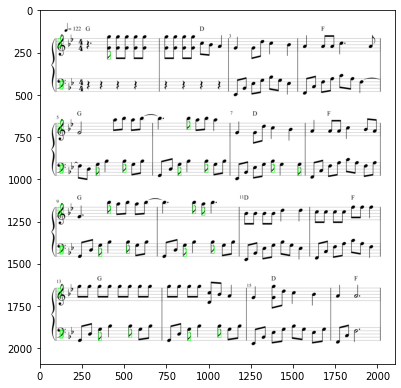

In [ ]:
hookRotatedLoc, hookRotatedRes, hookRotatedBox = matchTemplateRemake(img, hookRotatedTemplateResize, 0.55, None, True, True)

plt.figure(figsize = (14, 9))
# plt.subplot(1, 2, 1); plt.imshow(hookRotatedRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(hookRotatedBox, cmap = 'gray')

76


Text(0.5, 1.0, 'Resize')

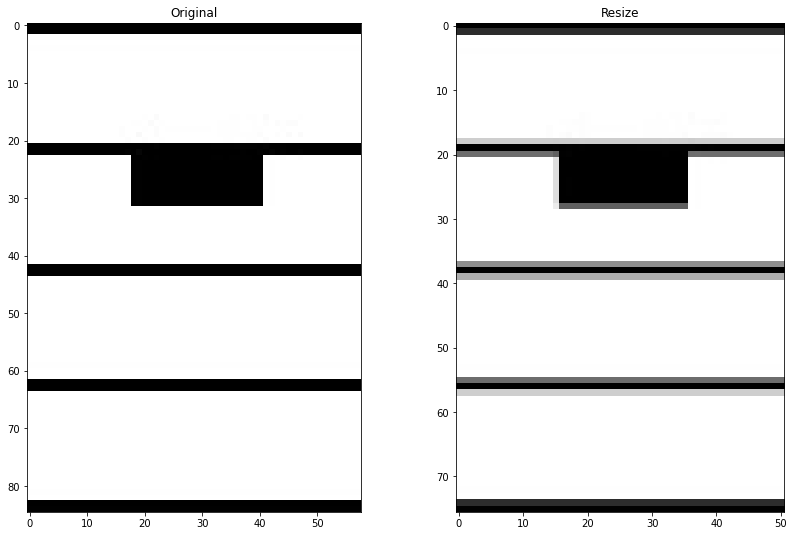

In [ ]:
wholeRestTemplate = cv2.imread(r"C:\Users\nguye\Downloads\templates\rest\whole_rest.jpg", cv2.IMREAD_GRAYSCALE) # Ratio W/H = 58/85

wholeRestChosenSize = int(int(avgLinesGap) + 1)*4
print(wholeRestChosenSize)
wholeRestTemplateSize = wholeRestChosenSize

wholeRestTemplateResize = cv2.resize(wholeRestTemplate, (int(wholeRestTemplateSize * (58/85)), int(wholeRestTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(wholeRestTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(wholeRestTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([], dtype=float64), array([], dtype=float64))
Before: 0 founded
After: (array([], dtype=float64), array([], dtype=float64))
After: 0 founded


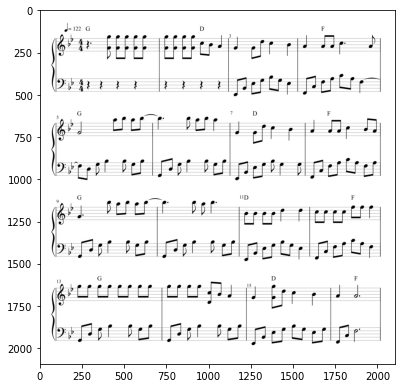

In [ ]:
wholeRestLoc, wholeRestRes, wholeResBox = matchTemplateRemake(img, wholeRestTemplateResize, 0.8, None, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(wholeRestRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(wholeResBox, cmap = 'gray')

76


Text(0.5, 1.0, 'Resize')

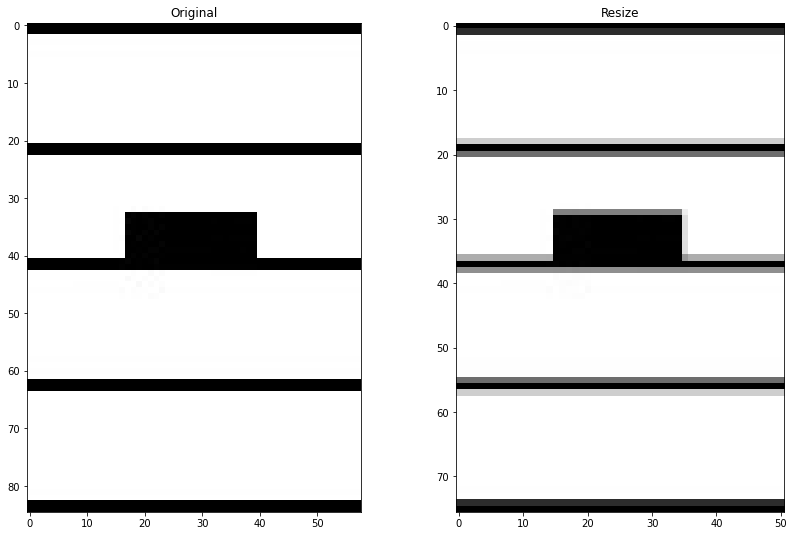

In [ ]:
halfRestTemplate = cv2.imread(r"C:\Users\nguye\Downloads\templates\rest\half_rest_1.jpg", cv2.IMREAD_GRAYSCALE) # Ratio W/H = 58/85

halfRestChosenSize = int(int(avgLinesGap) + 1)*4
print(halfRestChosenSize)
halfRestTemplateSize = halfRestChosenSize

halfRestTemplateResize = cv2.resize(halfRestTemplate, (int(halfRestTemplateSize * (58/85)), int(halfRestTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(halfRestTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(halfRestTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([], dtype=float64), array([], dtype=float64))
Before: 0 founded
After: (array([], dtype=float64), array([], dtype=float64))
After: 0 founded


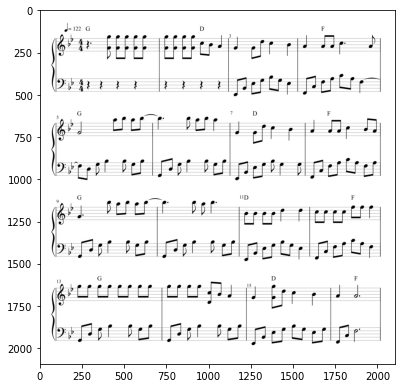

In [ ]:
halfRestLoc, halfRestRes, halfResBox = matchTemplateRemake(img, halfRestTemplateResize, 0.8, None, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(halfRestRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(halfResBox, cmap = 'gray')

76


Text(0.5, 1.0, 'Resize')

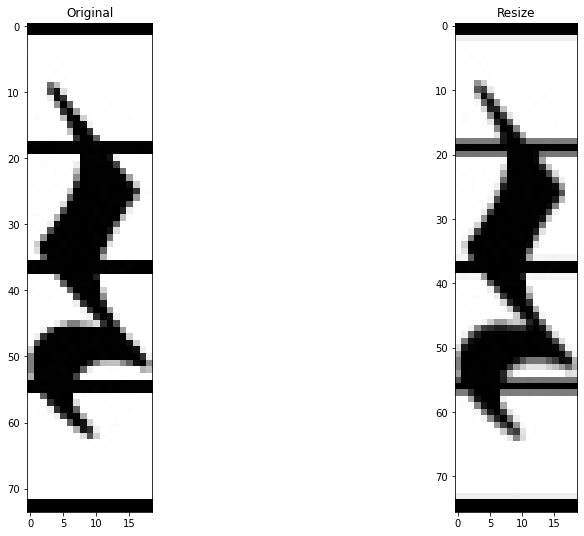

In [ ]:
quarterRestTemplate = cv2.imread(r"C:\Users\nguye\Downloads\templates\rest\quarter_rest.jpg", cv2.IMREAD_GRAYSCALE) # Ratio W/H = 19/74

quarterRestChosenSize = int(int(avgLinesGap) + 1)*4
print(quarterRestChosenSize)
quarterRestTemplateSize = quarterRestChosenSize

quarterRestTemplateResize = cv2.resize(quarterRestTemplate, (int(quarterRestTemplateSize * (19/74)), int(quarterRestTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(quarterRestTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(quarterRestTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([], dtype=float64), array([], dtype=float64))
Before: 0 founded
After: (array([], dtype=float64), array([], dtype=float64))
After: 0 founded


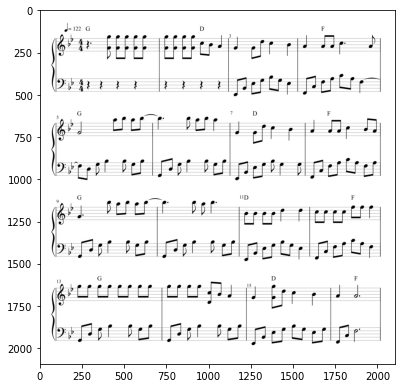

In [ ]:
quarterRestLoc, quarterRestRes, quarterResBox = matchTemplateRemake(img, quarterRestTemplateResize, 0.8, None, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(quarterRestRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(quarterResBox, cmap = 'gray')

76


Text(0.5, 1.0, 'Resize')

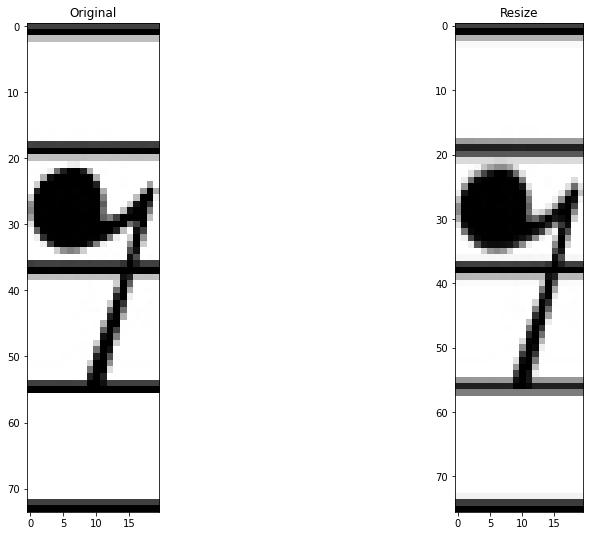

In [ ]:
eighthRestTemplate = cv2.imread(r"C:\Users\nguye\Downloads\templates\rest\eighth_rest.jpg", cv2.IMREAD_GRAYSCALE) # Ratio W/H = 20/74

eighthRestChosenSize = int(int(avgLinesGap) + 1)*4
print(eighthRestChosenSize)
eighthRestTemplateSize = eighthRestChosenSize

eighthRestTemplateResize = cv2.resize(eighthRestTemplate, (int(eighthRestTemplateSize * (20/74)), int(eighthRestTemplateSize)))

plt.figure(figsize = (14, 9))
plt.subplot(1, 2, 1); plt.imshow(eighthRestTemplate, cmap = 'gray'); plt.title('Original')
plt.subplot(1, 2, 2); plt.imshow(eighthRestTemplateResize, cmap = 'gray'); plt.title('Resize')

Before: (array([], dtype=float64), array([], dtype=float64))
Before: 0 founded
After: (array([], dtype=float64), array([], dtype=float64))
After: 0 founded


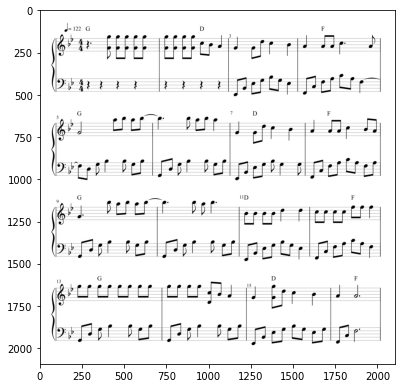

In [ ]:
eighthRestLoc, eighthRestRes, eighthResBox = matchTemplateRemake(img, eighthRestTemplateResize, 0.8, None, True, True)

plt.figure(figsize = (14, 9))
#plt.subplot(1, 2, 1); plt.imshow(eighthRestRes, cmap = 'gray')
plt.subplot(1, 2, 2); plt.imshow(eighthResBox, cmap = 'gray')